In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)

data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [3]:
data.sentiment.value_counts()

joy         6743
sadness     5794
anger       2704
fear        2366
love        1628
surprise     713
Name: sentiment, dtype: int64

In [4]:
data = data.dropna(subset=['content'])

In [5]:
X = data['content'].astype(str)
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Label encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# TF-IDF vectorization
vec = TfidfVectorizer()
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)

In [6]:
# Create a DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

In [7]:
# Train the classifier
dtc.fit(X_train_tfidf, y_train)

# Predict on the test set
dt_pred = dtc.predict(X_test_tfidf)

In [8]:
print(classification_report(y_test, dt_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, dt_pred)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       266
           1       0.85      0.86      0.86       254
           2       0.92      0.90      0.91       683
           3       0.80      0.78      0.79       156
           4       0.90      0.91      0.90       572
           5       0.78      0.80      0.79        64

    accuracy                           0.88      1995
   macro avg       0.85      0.85      0.85      1995
weighted avg       0.88      0.88      0.88      1995



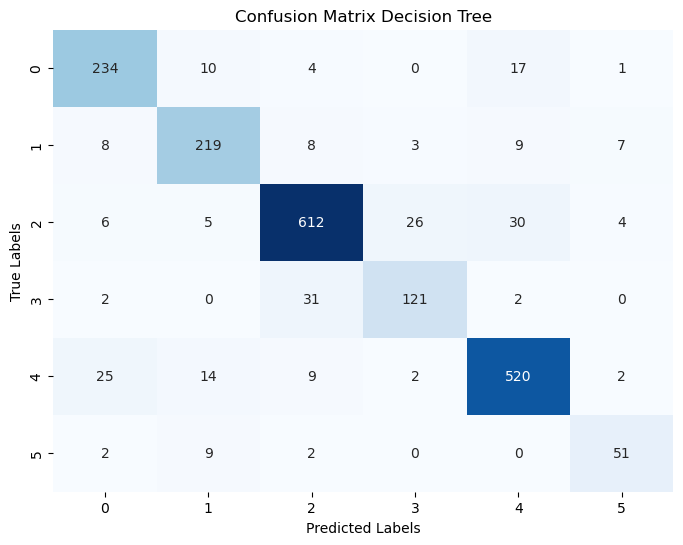

In [9]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels and title for better visualization
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Decision Tree')

# Display the plot
plt.show()

In [10]:
accuracy = accuracy_score(y_test, dt_pred) # accuracy
precision = precision_score(y_test, dt_pred, average='weighted') # precision 
recall = recall_score(y_test, dt_pred, average='weighted') # recall
f1 = f1_score(y_test, dt_pred, average='weighted') # f1

print("Name: ", "Decision Tree")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name:  Decision Tree
Accuracy:  0.8807017543859649
Precision:  0.881089951820483
Recall:  0.8807017543859649
F1:  0.8807766265759057
